In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import coint, adfuller
import statsmodels.api as sm

In [2]:
def loadPrices(fn):
    global nt, nInst
    df = pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    (nt, nInst) = df.shape
    return (df)


pricesFile = "./prices.txt"
prcAll = loadPrices(pricesFile)

In [3]:
prcAll

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
1,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
2,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
3,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
4,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.69,67.73,46.64,45.72,52.42,10.07,18.05,48.42,69.00,56.19,...,30.73,75.82,10.63,61.35,32.85,50.57,64.36,33.74,33.83,53.47
496,13.58,67.75,46.65,45.71,52.57,10.07,17.99,47.65,69.04,56.00,...,30.70,76.46,10.65,61.20,32.60,50.54,64.65,33.78,33.42,53.91
497,13.69,67.83,46.66,45.66,52.38,10.02,18.02,46.87,68.95,56.09,...,30.70,75.16,10.75,60.82,32.79,50.42,64.28,33.60,33.75,54.22
498,13.55,67.61,46.73,45.62,52.29,10.02,18.03,46.21,69.03,56.51,...,30.69,76.09,10.68,60.73,32.45,50.31,63.60,33.79,33.53,54.50


In [4]:
trainSize = 300

trainPrc = prcAll.iloc[:trainSize]
testPrc = prcAll.iloc[trainSize:]

In [41]:
nonStationInsts = []

for i in range(50):
    #find all non-stationary price series
    if adfuller(trainPrc[i])[1] > 0.1:
        nonStationInsts += [i]

In [113]:
#find instruments with that are cointegrated
critVal = 0.05

def findCointPairs(critVal = 0.05):
    cointInsts = []
    for i in range(len(nonStationInsts)):
        for j in range(i+1, len(nonStationInsts)):
            inst1 = nonStationInsts[i]
            inst2 = nonStationInsts[j]
            _, p, _ = coint(trainPrc[inst1], trainPrc[inst2], trend = "n")
            if p < critVal:
                cointInsts += [(inst1,inst2, p)]
    return cointInsts

In [114]:
cointInsts = findCointPairs(critVal)

In [115]:
cointInsts.sort(key = lambda x: x[2])
cointInsts

[(19, 37, 0.005262609235895489),
 (2, 12, 0.005559458731309372),
 (33, 42, 0.008931456364313048),
 (5, 30, 0.01097482528002985),
 (20, 36, 0.012769529125346187),
 (1, 22, 0.013506088762937992),
 (11, 33, 0.013740460012688315),
 (4, 5, 0.017343471624024765),
 (11, 42, 0.017473789261199982),
 (11, 34, 0.017848953279589283),
 (30, 44, 0.018267518348528355),
 (5, 44, 0.02104809347854966),
 (36, 37, 0.0217398716753471),
 (15, 20, 0.025063834607100086),
 (13, 45, 0.025233610696335788),
 (29, 30, 0.025564309490958444),
 (5, 31, 0.02604541305449921),
 (14, 44, 0.02615880794554728),
 (32, 37, 0.027053401523459062),
 (12, 16, 0.03010669635823125),
 (5, 26, 0.03090971168291922),
 (19, 32, 0.03129295693109269),
 (37, 48, 0.03150527684847415),
 (12, 27, 0.033120870545752856),
 (15, 36, 0.03469693878016877),
 (22, 30, 0.03594983770574506),
 (17, 18, 0.03714176229070113),
 (14, 47, 0.04007312563806253),
 (44, 47, 0.04041681947185599),
 (32, 48, 0.0407517851315404),
 (21, 22, 0.043246591332436746),
 (

In [154]:
stationSpread = []
for pair in cointInsts:
    inst1 = pair[0]
    inst2 = pair[1]

    inst1Prc = trainPrc[inst1]
    inst2Prc = trainPrc[inst2]

    model=sm.OLS(inst1Prc, inst2Prc).fit()
    spread = inst1Prc - model.params.iloc[0] * inst2Prc 
    # conduct Augmented Dickey-Fuller test
    adf = adfuller(spread, maxlag = 1)
    if adf[1] < 0.01:
        stationSpread += [(inst1, inst2, model.params.iloc[0])]
#xticker = range(trainSize)
#plt.plot(xticker, inst1Prc, label = inst1Index)
#plt.plot(xticker, inst2Prc, label = inst2Index)
#plt.legend()
stationSpread

[(2, 12, 1.7644526415538535), (12, 16, 0.7605093340797013)]

In [134]:
#model=sm.OLS(trainPrc[pair[0]], trainPrc[pair[1]]).fit()
#print('Hedge Ratio = ', model.params.iloc[0])
#spread = inst1Prc - model.params.iloc[0] * inst2Prc 
#ax = spread.plot(figsize=(6, 3), title = "Pair's Spread")
#ax.set_ylabel("Spread")
#ax.grid(True);

In [ ]:
# conduct Augmented Dickey-Fuller test
#adf = adfuller(spread, maxlag = 1)
#print('P Value = ', adf[1])

# probablity critical values
#print(adf[4])
# print regression summary results

#plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
#plt.axis('off')
#plt.tight_layout()
#plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)

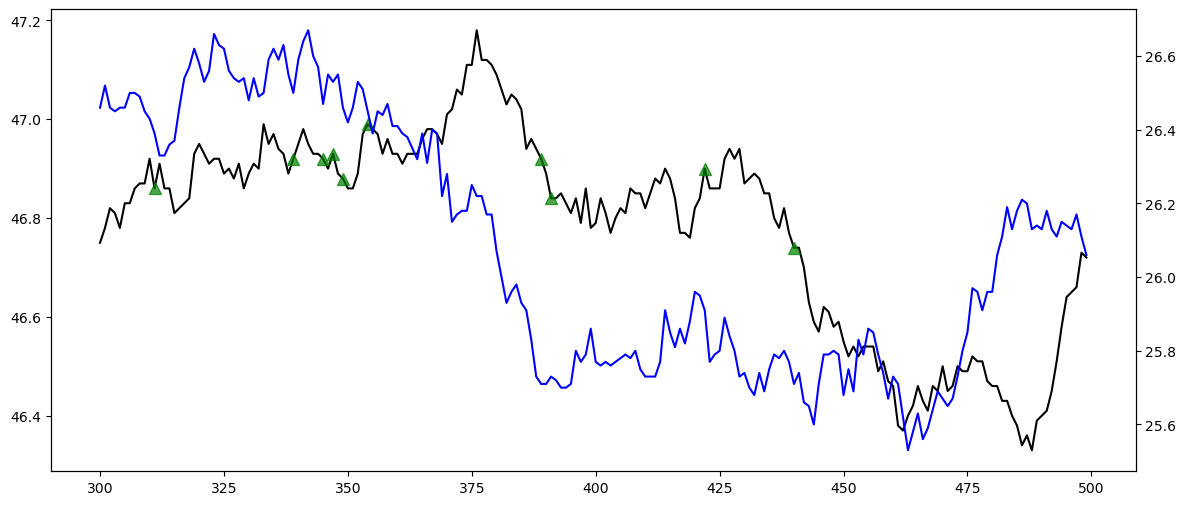

In [160]:
df_zScore = pd.DataFrame()
def zscore(series):
    return (series - series.mean()) / np.std(series)

ratios = testPrc[16] / testPrc[12]
df_zScore['z'] = zscore(ratios)
df_zScore['z upper limit'] = np.mean(df_zScore['z']) + np.std(df_zScore['z'])
df_zScore['z lower limit'] = np.mean(df_zScore['z']) - np.std(df_zScore['z'])

df_zScore['signals2'] = np.select([df_zScore['z'] > \
                                 df_zScore['z upper limit'], df_zScore['z'] < df_zScore['z lower limit']], [-1, 1], default=0)# we take the first order difference to obtain portfolio position in that stock
df_zScore['positions2'] = df_zScore['signals2'].diff()
df_zScore['signals1'] = -df_zScore['signals2']
df_zScore['positions1'] = df_zScore['signals1'].diff()

# visualize trading signals and position
fig=plt.figure(figsize=(14,6))
bx = fig.add_subplot(111)   
bx2 = bx.twinx()#plot two different assets
l1, = bx.plot(testPrc[2], c='black')
l2, = bx2.plot(testPrc[12], c='blue')
u1, = bx.plot(testPrc[2][df_zScore['positions1'] == 1], lw=0, marker='^', markersize=8, c='g',alpha=0.7)

In [151]:
df_zScore

,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
300,-1.551153,1.0,-1.0,1,NaN,-1,NaN
301,-1.466184,1.0,-1.0,1,0.0,-1,0.0
302,-1.674087,1.0,-1.0,1,0.0,-1,0.0
303,-1.597324,1.0,-1.0,1,0.0,-1,0.0
304,-1.995193,1.0,-1.0,1,0.0,-1,0.0
...,...,...,...,...,...,...,...
495,0.865929,1.0,-1.0,0,1.0,0,-1.0
496,0.632666,1.0,-1.0,0,0.0,0,0.0
497,0.962614,1.0,-1.0,0,0.0,0,0.0
498,0.643794,1.0,-1.0,0,0.0,0,0.0
